# 1. Celebrity Photo Collection



We can use Selenium or Web scraping modules and write code to download images from google 

Code reference - https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d

or

We can use Fatkun extension which can download batch of image from google.

Fatkun - https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf/RK%3D2/RS%3DPnB3CMxxSoOYRnLD3KKFviCVQvs-

or

Buying images from a third party 

In [37]:
import selenium
import time
from selenium import webdriver


def fetch_image_urls(query:str, max_links_to_fetch:int, sleep_between_interactions:int=1):
    DRIVER_PATH = "C:/Users/SABAREESH/Downloads/chromedriver_win32/chromedriver.exe"
    wd = webdriver.Chrome(executable_path=DRIVER_PATH)
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [38]:
def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [39]:
import os

def search_and_download(search_term:str,driver_path:str,target_path='./images',number_images=50):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    
    res = fetch_image_urls(search_term, number_images, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

In [41]:
heros = ["Vijay","Ajith","STR","Kamal Hasan","Vikram"]


for i in heros:
    search_and_download(i+"Tamil Actors","C:/Users/SABAREESH/Downloads/chromedriver_win32/chromedriver.exe" ,"C:/Users/SABAREESH/Downloads/For Project/"+i,)

# Data Cleaning

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os


In [85]:
img = cv2.imread("E:/Project/Image Classification/Images/STR/simbu-stills-photos-pictures-394.jpg")
#plt.imshow(gray)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [86]:
face_cascade = cv2.CascadeClassifier("E:/Project/Image Classification/opencv opencv master data-haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("E:\\/Project/Image Classification/opencv opencv master data-haarcascades/haarcascade_eye.xml")

In [87]:
faces = face_cascade.detectMultiScale(img)
faces

array([[164,  88, 179, 179]])

In [88]:
x,y,w,h = faces[0]

In [89]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),6)
#plt.imshow(face_img)

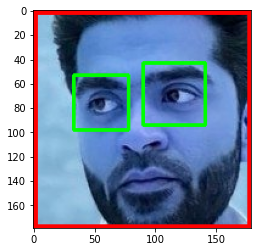

In [90]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    try:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = face_img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    except:
        pass
    
            
            
plt.imshow(roi_color,cmap="gray")
    

In [91]:
def crop_image(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(img)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = face_img[y:y+h,x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if(len(eyes)) >= 2:
                return roi_color
    except:
        pass
    
    

In [92]:
current = "E:/Project/Image Classification/Images"
cropped = "E:/Project/Image Classification/Images/Cropped/"

imgdir = []

for each in os.scandir(current):
    if each.is_dir():
        imgdir.append(each.path)

In [93]:
imgdir.pop(1)

'E:/Project/Image Classification/Images\\Cropped'

In [94]:
imgdir

['E:/Project/Image Classification/Images\\Ajith',
 'E:/Project/Image Classification/Images\\Kamal Hasan',
 'E:/Project/Image Classification/Images\\STR',
 'E:/Project/Image Classification/Images\\Vijay',
 'E:/Project/Image Classification/Images\\Vikram']

In [14]:
cropped_img = []
celeb_files = {}

for i in imgdir:
    count = 1
    celeb_name = i.split("/")[-1][7:]
    
    celeb_files[celeb_name] = []
    
    for each in os.scandir(i):
        roi_color = crop_image(each.path)
        
        if roi_color is not None:
            cropped_folder = cropped + celeb_name
            
            if not os.path.exists(cropped_folder):
                cropped_img.append(cropped_folder)
                os.makedirs(cropped_folder)
                
                
            cropped_filename = celeb_name + str(count) + ".png"
            cropped_filepath = cropped_folder + "/" + cropped_filename
            cv2.imwrite(cropped_filepath,roi_color)
            
            celeb_files[celeb_name].append(cropped_filepath)
            count = count + 1
            
    

# Wavelet Transformation

In [95]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [181]:
# Taken from stackoverflow


def wt(img,mode="haar",level=1):
    copy = img
    copy = cv2.cvtColor(copy,cv2.COLOR_RGB2GRAY)
    copy = np.float32(copy)
    copy /= 255
    
    coeff = pywt.wavedec2(copy,mode,level=level)
    
    coeff_h = list(coeff)
    coeff_h[0] *= 0
    
    copy_h = pywt.waverec2(coeff_h,mode)
    copy_h *= 255
    copy_h = np.uint8(copy_h)
    
    return copy_h
    

In [97]:
aa = cv2.imread("E:/Project/Image Classification/Images/Cropped/STR/STR22.png")
a = wt(aa)

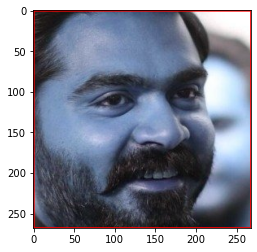

In [98]:
plt.imshow(aa,cmap='gray')

In [99]:
count_dict = {}
count = 0
for key,value in celeb_files.items():
    count_dict[key] = count
    count +=1
count_dict

{'Ajith': 0, 'Kamal Hasan': 1, 'STR': 2, 'Vijay': 3, 'Vikram': 4}

In [208]:
x = []
y = []


for key, value in celeb_files.items():
    for v in value:
        img = cv2.imread(v)
        if img is None:
            continue
        scaled = cv2.resize(img,(32,32))
        img_wt = wt(scaled,"db1",1)
        scaled_wt = cv2.resize(img_wt,(32,32))
        combined = np.vstack((scaled.reshape(32*32*3,1),scaled_wt.resize(32*32,1)))
        x.append(combined)
        y.append(count_dict[key])

        

In [229]:
x.shape

(229, 3073)

In [209]:
import numpy as np
x = np.array(x).reshape(len(x), 3073).astype(float)



In [210]:
import math
for i in x:
    a = math.floor(np.mean(i[:-1]))
    i[-1] = a


In [211]:
x

array([[124., 117., 108., ..., 148., 150., 142.],
       [  3.,  11.,   8., ..., 218., 246.,  94.],
       [ 64.,  50.,  31., ..., 167., 207., 116.],
       ...,
       [ 40.,  96., 129., ...,  25.,  48., 147.],
       [ 18.,  33.,  40., ...,  99., 117., 116.],
       [114., 150., 174., ..., 156., 178., 142.]])

# Model Training

In [212]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [224]:
svc = SVC(kernel="poly")
svc.fit(x_train,y_train)
svc.predict(x_test)
svc.score(x_test,y_test)

0.6379310344827587

In [227]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.predict(x_test)
rfc.score(x_test,y_test)

0.5689655172413793

In [228]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# Load the dataset (replace with your own data loading code)
data = load_digits()
X = x
y = y

# Preprocess the data (optional)
X = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with feature extraction (PCA) and SVC
pipeline = make_pipeline(
    PCA(n_components=50),  # Adjust the number of components as needed
    SVC(kernel='rbf')
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 0.01, 0.001]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Model:", best_model)
print("Accuracy:", accuracy)


Best Model: Pipeline(steps=[('pca', PCA(n_components=50)), ('svc', SVC(C=10, gamma=0.001))])
Accuracy: 0.45652173913043476
